In [1]:
#importing libraries that I will use
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
#library made from the last activity 
import distributions
import math

If there is a jump eliminate the next three cells

In [ ]:
#read csv from an url, if the link is broken jump til salar
url = 'https://www.ncei.noaa.gov/orders/cdo/1924082.txt'
data = pd.read_csv(url, sep = "\s+", skiprows = [1],header = 0, na_values=-9999)

In [ ]:
#making the dataframe easier to use
data = data.reset_index()

In [ ]:
#making the correct columns and eliminating the useless
data['STATION_NAME'] = data['level_1']+' '+data['STATION']+' '+data['STATION_NAME']
data['STATION'] = data['level_0']
data = data.drop(['level_0','level_1','STATION'], axis = 1)
data.head()
data.to_csv("NOAlalokka.csv", index = False)

In [ ]:
data

## Salto

Eliminate hashtags

In [2]:
data = pd.read_csv("NOAlalokka.csv")

In [3]:
data.head()

,STATION_NAME,DATE,PRCP,TMAX,TMIN
0,SODANKYLA LOKKA FI,19590101,0.03,NaN,9.0
1,SODANKYLA LOKKA FI,19590102,0.00,NaN,6.0
2,SODANKYLA LOKKA FI,19590103,0.02,NaN,-9.0
3,SODANKYLA LOKKA FI,19590104,0.08,NaN,10.0
4,SODANKYLA LOKKA FI,19590105,0.09,NaN,13.0


### This part does not belong to the "salto"

In [4]:
#checking how many na values has the columns that will be used for analysis how many days rain by wee
data.PRCP.isna().sum()

2

In [5]:
#There are only two na values, so if we take it as 0, there will be no problem
#checking the dimension of the dataset
data_shape = data.shape

print("Columns: ",data_shape[0])
print("Rows: ",data_shape[1])

Columns:  21307
Rows:  5


In [6]:
#checkin if rained,
data['Rained'] = data.PRCP > 0

In [7]:
data.head()

,STATION_NAME,DATE,PRCP,TMAX,TMIN,Rained
0,SODANKYLA LOKKA FI,19590101,0.03,NaN,9.0,True
1,SODANKYLA LOKKA FI,19590102,0.00,NaN,6.0,False
2,SODANKYLA LOKKA FI,19590103,0.02,NaN,-9.0,True
3,SODANKYLA LOKKA FI,19590104,0.08,NaN,10.0,True
4,SODANKYLA LOKKA FI,19590105,0.09,NaN,13.0,True


In [8]:
#making a datetime object into the index to be able to use its methods, the resample in this case
data.index = pd.to_datetime(data.DATE, format = '%Y%m%d')

In [9]:
#eliminating columns that is the index
data.drop("DATE", axis = 1, inplace = True)

In [10]:
data.head()

,STATION_NAME,PRCP,TMAX,TMIN,Rained
DATE,,,,,
1959-01-01,SODANKYLA LOKKA FI,0.03,NaN,9.0,True
1959-01-02,SODANKYLA LOKKA FI,0.00,NaN,6.0,False
1959-01-03,SODANKYLA LOKKA FI,0.02,NaN,-9.0,True
1959-01-04,SODANKYLA LOKKA FI,0.08,NaN,10.0,True
1959-01-05,SODANKYLA LOKKA FI,0.09,NaN,13.0,True


In [11]:
#function to change the boolens True and False into 1 and 0
def booleano(Value):
    if Value == True:
        return 1
    else:
        return 0

In [12]:
#applying the function for each row in the column Rained
data.Rained = data.Rained.apply(booleano)

In [13]:
data.head()

,STATION_NAME,PRCP,TMAX,TMIN,Rained
DATE,,,,,
1959-01-01,SODANKYLA LOKKA FI,0.03,NaN,9.0,1
1959-01-02,SODANKYLA LOKKA FI,0.00,NaN,6.0,0
1959-01-03,SODANKYLA LOKKA FI,0.02,NaN,-9.0,1
1959-01-04,SODANKYLA LOKKA FI,0.08,NaN,10.0,1
1959-01-05,SODANKYLA LOKKA FI,0.09,NaN,13.0,1


In [14]:
#final data resample to week, and make a copy because there will be different plottings
data_final = data.copy()
#resampling by week
data_final = data_final.resample("W")
"""Only aceepting as true the sum of week that are 7 days, the other cases are not a complete week, so the NaN values in Rained are not 
complete weeks"""
data_final = data_final.sum()[data_final.count() == 7]

data_final

,PRCP,TMAX,TMIN,Rained
DATE,,,,
1959-01-04,NaN,NaN,NaN,NaN
1959-01-11,0.35,NaN,72.0,6.0
1959-01-18,0.37,NaN,-77.0,3.0
1959-01-25,0.21,NaN,-166.0,4.0
1959-02-01,0.26,NaN,-11.0,5.0
...,...,...,...,...
2019-09-08,0.41,412.0,282.0,5.0
2019-09-15,0.34,393.0,273.0,3.0
2019-09-22,0.06,301.0,199.0,4.0


In [15]:
#getting the weeks that are only 7 days
data_final = data_final.loc[data_final.Rained.notna()]

In [16]:
data_final

,PRCP,TMAX,TMIN,Rained
DATE,,,,
1959-01-11,0.35,NaN,72.0,6.0
1959-01-18,0.37,NaN,-77.0,3.0
1959-01-25,0.21,NaN,-166.0,4.0
1959-02-01,0.26,NaN,-11.0,5.0
1959-02-08,0.03,NaN,104.0,2.0
...,...,...,...,...
2019-09-01,0.08,463.0,337.0,2.0
2019-09-08,0.41,412.0,282.0,5.0
2019-09-15,0.34,393.0,273.0,3.0


In [17]:
#getting the dataframe for plotting where are grouped by times that rained
plotting_data = data_final.groupby("Rained").count().reset_index(drop = False)
plotting_data
#it can be eliminated TMAX and TMIN columns
plotting_data.drop(["TMAX","TMIN"], axis = 1, inplace = True)

In [18]:
#since the analysis is using PRCP, we need the count of times these were repited
plotting_data

,Rained,PRCP
0,0.0,156
1,1.0,300
2,2.0,491
3,3.0,568
4,4.0,595
5,5.0,501
6,6.0,296
7,7.0,134


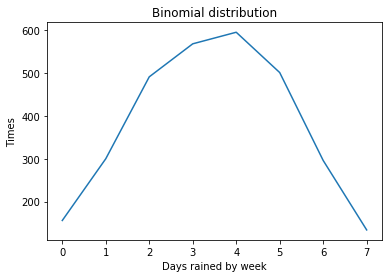

In [19]:
#plotting binomial distribution
#x axis the times it rained by week, first paramteter and, y axis the repetition, second parameter
plt.plot(plotting_data.Rained , plotting_data.PRCP)
#title of the plot
plt.title("Binomial distribution")
#name of the y - axis
plt.ylabel("Times")
#name of the x - axis
plt.xlabel("Days rained by week")
plt.show()

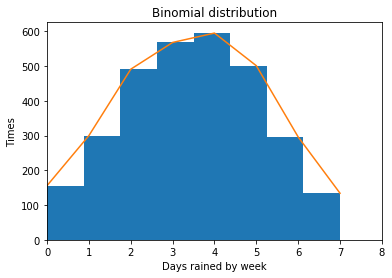

In [20]:
#plotting using the histogram and plot
plt.hist(data_final.Rained, bins = 8 )
plt.plot(plotting_data.Rained , plotting_data.PRCP)
#title of the plot
plt.title("Binomial distribution")
#name of the y - axis
plt.ylabel("Times")
#name of the x - axis
plt.xlabel("Days rained by week")
#limits of the x - axis
plt.xlim([0,8])
plt.show()

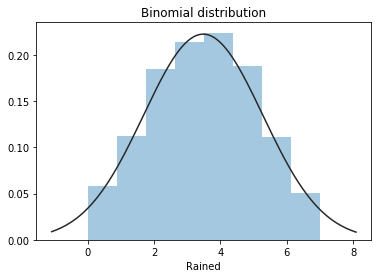

In [24]:
#plotting using seeaborn, but there is a normalization to make it soft
sns.distplot(data_final.Rained, fit =  norm, kde = False, bins = 8)
plt.title("Binomial distribution")
plt.show()

In [25]:
#probability that rains at least one time in the week
p = data.Rained.mean()
#sample 
shape_data = data_final.shape
#actually n is 8, but in seven takes in account 0 so is 7 + 1
n = 7

Moments

In [28]:
#getting the mean
mean_data = n * p
#getting the variance
var_data = n * p * (1-p)

In [29]:
data.Rained.mean()

0.49730135636175904

In [30]:
data.Rained.var()

0.25000445076461103

In [27]:
print("Probability: ",p)
print("Sample: ",shape_data[0])
print("First moment Mean: ", mean_data)
print("Second moment Variance: ", var_data)

Probability:  0.49730135636175904
Sample:  3043
First moment Mean:  3.4811094945323133
Second moment Variance:  1.7499490212575968


# Using the distribution we made in the last homework we are going to make a simulation of a binomial

In [31]:
confirming_data = distributions.binomial(n, p, shape_data[0])

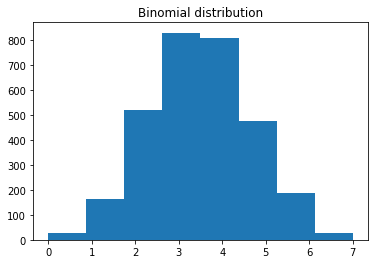

In [32]:
#plotting the histogram
plt.hist(confirming_data, bins = n+1)
plt.title("Binomial distribution")
plt.show()

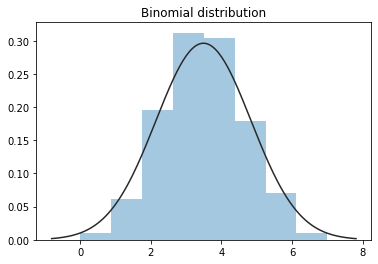

In [33]:
#plotting the histogram, in this plot there is a normalization that makes the distribution soft
sns.distplot(confirming_data, fit =  norm, kde = False, bins = n+1)
plt.title("Binomial distribution")
plt.show()

# Plotting the real probability against the theorical probabilities

In [34]:
def comb(n ,x):
    """
    Docstring: function to get a combinatory
    input: n objects for combainin, x ways of combaining
    output: a combinatory
    """
    #getting the numerator
    numer = math.factorial(n)
    #getting the denominator
    denom = math.factorial(x)*math.factorial(n-x)
    return int(numer / denom)

In [35]:
#making the real distribution
def realbinomial(pro , n):
    """
    Docstring: description function to get the binomial probability
    Input: pro is the proability, n is maximum number of succes
    Output: return a list of list where the first sublist contain the number of success and the second 
    sublist the probabilities of each one
    """
    p_vals = []
    for i in range(n+1):
        #it is the part of p ^ x
        first_part = pro**i
        #It is the part of (1-p)^(n-x)
        second_part = (1-pro)**(n-i)
        p = comb(n, i) * first_part * second_part
        p_vals.append(p)
        
    return [list(range(0,n+1)), p_vals]

In [36]:
real_data = realbinomial(p,7)

In [37]:
real_data

[[0, 1, 2, 3, 4, 5, 6, 7],
 [0.008112486629530208,
  0.05617770126837032,
  0.16672362691802406,
  0.27488929617890995,
  0.271937912642305,
  0.16141093020396957,
  0.05322597381014101,
  0.007522072348750339]]

### Plotting the theorical points of the probability and n against the real histograms

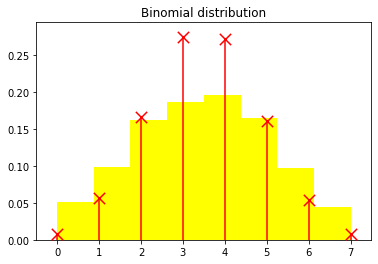

In [38]:
#plotting the histogram without appliyng the normalization, so this is the most representative plot
#maximum likelihood
plt.hist(data_final.Rained, bins = n+1, color = 'yellow', weights =[1/shape_data[0]]*shape_data[0])
plt.title("Binomial distribution")
plt.xticks(range(n+1))
#plotting the points of the theorical probability
plt.scatter(real_data[0], real_data[1], color = 'red', zorder = 3, s=128, marker='x')
#plotting lines from the x - axis up to the points of the theorical probability
plt.vlines(real_data[0], 0,real_data[1], color = 'red')
plt.show()

## Making into a soft one

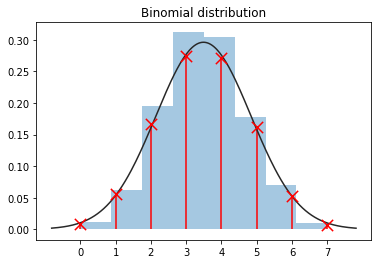

In [39]:
#plotting the histogram using seaborn
#but in this case there is normalization that makes a soft distribution
sns.distplot(confirming_data, fit =  norm, kde = False, bins = n+1)
plt.title("Binomial distribution")
plt.xticks(range(n+1))
#plotting the points of the theorical probability
plt.scatter(real_data[0], real_data[1], color = 'red', zorder = 3, s=128, marker='x')
#plotting lines from the x - axis up to the points of the theorical probability
plt.vlines(real_data[0], 0,real_data[1], color = 'red')
plt.show()

### Conclusion:

We can observe it is not exactly the theorical binomial, however, it is a binomial distribution in the practiced because are so similar in the tails, this is because the probability is 0.49 so in the theorical there will be more height in the median and mean, but in the practice change.
Additionally, the most days it rained by week were 3 and 4.